In [46]:
import numpy as np 
import numpy 
import matplotlib.pyplot as plt 
import seaborn as sn 
import cv2
import os
import tensorflow as tf
from tqdm import tqdm
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization, GlobalAveragePooling2D, Input, Activation
from keras.constraints import maxnorm
from keras.regularizers import l1, l2 
from keras.utils import to_categorical
from keras.optimizers import Adam, SGD
from keras.utils import np_utils
plt.style.use('fivethirtyeight')

print('lin is imported')

lin is imported


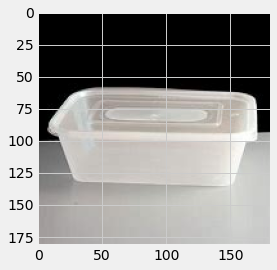

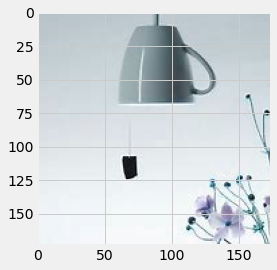

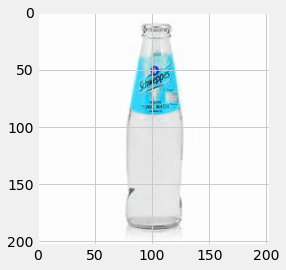

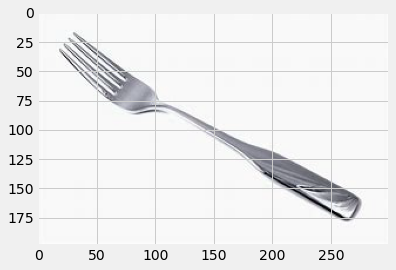

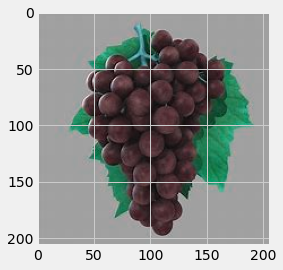

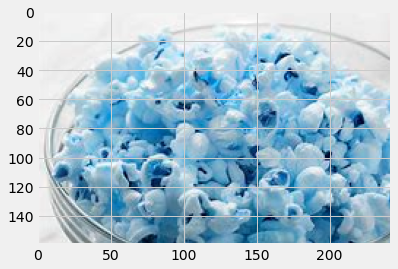

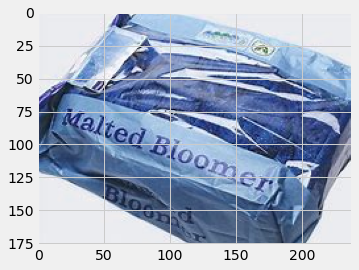

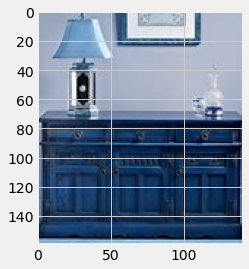

In [47]:
# Data Directory and Categories
Data_Directory = r"/media/ali/0E8E134E0E8E134E/control sapienza/third term/machine learning/homework/second homework/dataset"
Categories = ["plastic_container", "teacup", "Tonic_Water", "Forks", "Grapes" , "Popcorn", "Packaged_Bread", "Furniture_&_Wood_Polishes"] 
# Show Just one Image as an example 
for item in Categories:
  path = os.path.join (Data_Directory, item)
  for img in os.listdir (path):
    img_array = cv2.imread (os.path.join (path, img))
    plt.imshow (img_array)
    plt.show()
    break
    break

In [48]:
# Read and Append all Images in Dataset
dataset = []
image_size = 32 # Resize all images to this Size 
def create_training_data ():
    for item in Categories:
        path = os.path.join (Data_Directory, item)
        class_num = Categories.index ( item)
        for image in tqdm (os.listdir (path)):
            try:
                img_array = cv2.imread (os.path.join (path, image)) # Convert to array 
                new_array = cv2.resize (img_array, (image_size, image_size )) # Resize to no
                dataset.append([new_array,class_num])
            except Exception as e:
                pass
create_training_data()
print(len(dataset))

100%|██████████| 1321/1321 [00:02<00:00, 577.09it/s]

9037


In [49]:
# Define X and Y (Features and Labels) 
X = [] 
y = []
for features, label in dataset:
    X.append(features)
    y.append(label)

In [50]:
# Change both to the numpy arrays
X = np.array (X) 
y = np.array (y)
y = y.reshape (len (y), 1)
len (y)

9037

In [51]:
# split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state = 42, shuffle=True)

In [52]:
print(X_train.shape), print(y_train.shape)
print(X_test.shape), print(y_test.shape)

(7229, 32, 32, 3)
(7229, 1)
(1808, 32, 32, 3)
(1808, 1)


(None, None)

In [53]:
#y_train_cat=to_categorical(y_train)
#y_test_cat=to_categorical(y_test)

In [54]:
X_train = X_train/255
X_test = X_test/255

In [55]:
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
class_num = y_test.shape[1]

In [56]:
# Set random seed for purposes of reproducibility
seed = 21

In [57]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=X_train.shape[1:], padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3), input_shape=(3, 32, 32), activation='relu', padding='same'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(BatchNormalization())

In [58]:
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(BatchNormalization())
    
model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())

In [59]:
model.add(Flatten())
model.add(Dropout(0.2))

In [60]:
model.add(Dense(256, kernel_constraint=maxnorm(3)))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
    
model.add(Dense(128, kernel_constraint=maxnorm(3)))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
class_num

8

In [61]:
model.add(Dense(class_num))
model.add(Activation('softmax'))

In [62]:
epochs = 25
optimizer = 'adam'
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_16 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
dropout_17 (Dropout)         (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_15 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 32, 32, 64)        18496     
_________________________________________________________________
activation_17 (Activation)   (None, 32, 32, 64)       

In [63]:
np.random.seed(seed)
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=25, batch_size=256)


Train on 7229 samples, validate on 1808 samples
Epoch 1/25
7229/7229 [==============================] - 50s 7ms/step - loss: 2.0067 - accuracy: 0.3280 - val_loss: 2.1039 - val_accuracy: 0.1515
Epoch 2/25
7229/7229 [==============================] - 53s 7ms/step - loss: 1.5246 - accuracy: 0.4746 - val_loss: 2.7824 - val_accuracy: 0.1018
Epoch 3/25
7229/7229 [==============================] - 52s 7ms/step - loss: 1.3861 - accuracy: 0.5254 - val_loss: 2.9875 - val_accuracy: 0.1018
Epoch 4/25
7229/7229 [==============================] - 52s 7ms/step - loss: 1.2751 - accuracy: 0.5684 - val_loss: 4.2261 - val_accuracy: 0.1018
Epoch 5/25
7229/7229 [==============================] - 52s 7ms/step - loss: 1.1866 - accuracy: 0.5948 - val_loss: 6.4075 - val_accuracy: 0.1018
Epoch 6/25
7229/7229 [==============================] - 52s 7ms/step - loss: 1.0990 - accuracy: 0.6269 - val_loss: 5.3726 - val_accuracy: 0.1018
Epoch 7/25
7229/7229 [==============================] - 52s 7ms/step - loss: 1.04

In [64]:
# Model evaluation
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 60.79%
